    Stat  Zero_Deviation_Probability (%)  Average_Deviation
0     40                            4.22           2.514177
1     41                            4.63           2.454184
2     42                            4.44           2.420368
3     43                            4.66           2.376444
4     44                            4.70           2.321901
..   ...                             ...                ...
56    96                           13.95           0.686064
57    97                           15.69           0.650168
58    98                           16.82           0.629097
59    99                           18.77           0.601258
60   100                           18.84           0.589052

[61 rows x 3 columns]


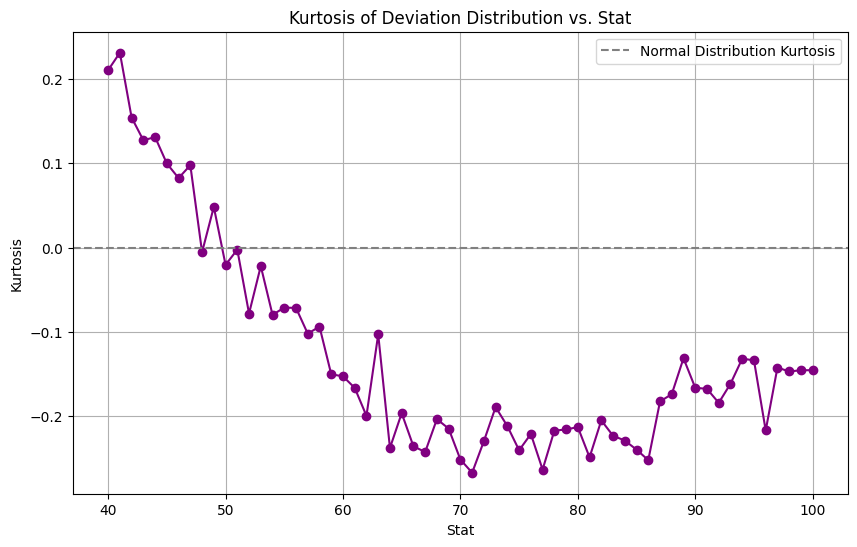

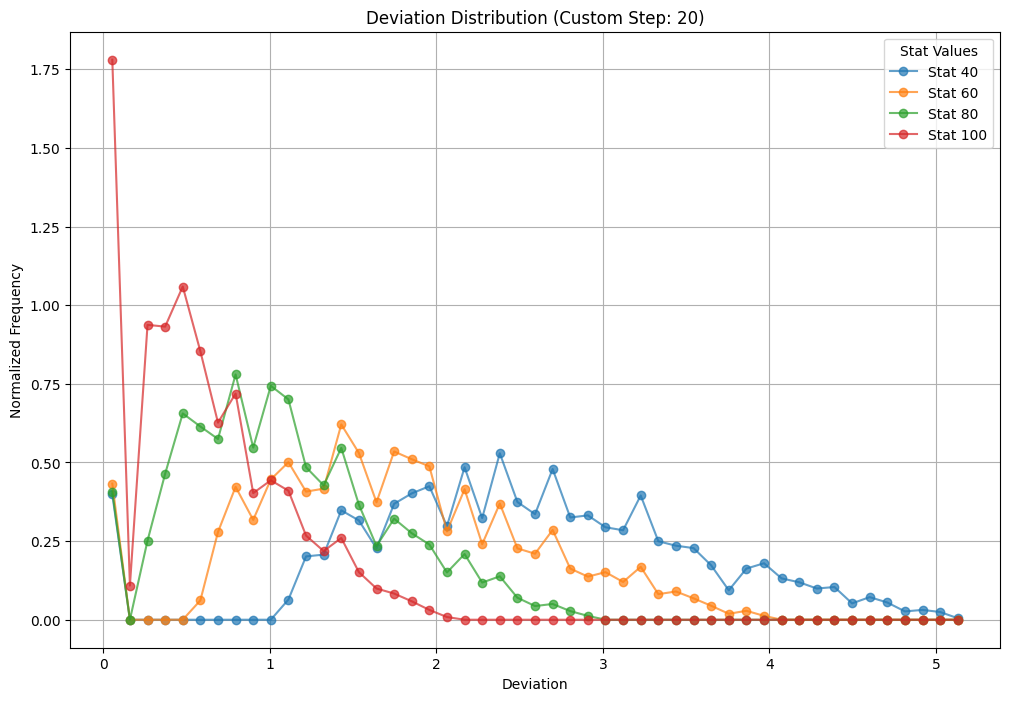

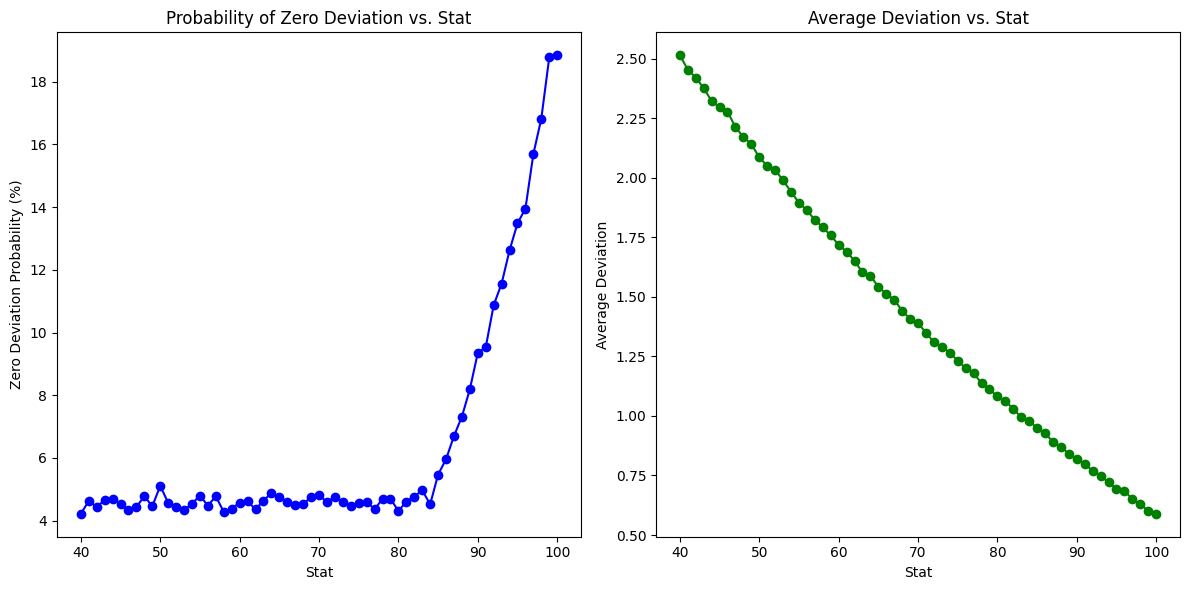

,Stat,Average,Perfect Throw (%)
0,40,2.514177,4.22
1,50,2.085423,5.11
2,60,1.718738,4.58
3,70,1.389667,4.82
4,80,1.082481,4.31
5,90,0.817139,9.35
6,100,0.589052,18.84


In [ ]:
import pandas as pd
import random
import matplotlib.pyplot as plt
from scipy.stats import kurtosis
import numpy as np
import math


perfect_throw_threshold = -1#0.05
def_min_dev = 0##0.75
zero_min_dev_diff = 50
roll_zero_deviation_base = 5
num_dice = 2
potent = 2
roll_zero_deviation = 15

magnitude_effect = 100
lesser_mag_effect = 100
lesser_diff_factor = 1 ## 1
lesser_potent = 2 ## 2
lesser_mul_mod = 1 ## 2

def customlog(x, base):
	return math.log(x) / math.log(base)

def calculate_deviation(stat, unit_random_func, is_grenade, base_gr_rotation_factor, base_launcher_rotation_factor):
    roll = unit_random_func(100, num_dice) + 1  # Random roll between 1 and 100
    diff = stat - roll


    min_deviation = 0 if diff >= zero_min_dev_diff else def_min_dev
    lesser_deviation = 0
    rotation_factor = base_gr_rotation_factor if is_grenade else base_launcher_rotation_factor
    length_factor = 0.088
    ratio = 0

   #if roll <= roll_zero_deviation:
    if roll <= roll_zero_deviation:
        deviation = 0
    else:
        ratio = ((magnitude_effect - diff) ** potent) / (magnitude_effect ** potent)
        deviation = max(min_deviation, (((magnitude_effect - diff) ** potent) / (magnitude_effect ** potent) ) )* 2
        lesser_deviation = deviation #max(min_deviation, (((lesser_mag_effect - diff*lesser_diff_factor) ** lesser_potent) / (lesser_mag_effect ** lesser_potent) ) )*lesser_mul_mod
    

    deviation = 0 if ((lesser_deviation)) <= perfect_throw_threshold else deviation
    #print(stat, roll, deviation, lesser_deviation)

    return deviation, roll


def logcalculate_deviation(stat, unit_random_func, is_grenade, base_gr_rotation_factor, base_launcher_rotation_factor):
    roll = unit_random_func(100, num_dice) + 1  # Random roll between 1 and 100
    diff = stat - roll
    dynamic_potent = potent * (1 - stat / 200)  # Higher stat lowers the exponent


    min_deviation = 0 #if diff >= zero_min_dev_diff else def_min_dev

    rotation_factor = base_gr_rotation_factor if is_grenade else base_launcher_rotation_factor
    length_factor = 0.088

   #if roll <= roll_zero_deviation:
    if roll <= roll_zero_deviation:
        deviation = 0
    else:

        deviation = max(0, math.log1p(((120 - diff) ** potent) / (120 ** potent) ))


    

        
    return deviation, roll



#def unit_random_func(max_value, num_dice=3):
    
   # total = sum(random.randint(0, max_value) for _ in range(num_dice))
   # max_possible = num_dice * max_value
   # return int((total / max_possible) * max_value)

def unit_random_func(max_value, num_dice):

    num_dice = num_dice or 2 
    total = 0

    dice_value = max_value // num_dice

    for _ in range(num_dice):
        total = total + random.randint(0, dice_value)

    return total


#def unit_random_func(max_value, num_dice=2):
    #total = sum(random.randint(0, max_value // num_dice) for _ in range(num_dice))
    #return total

# Simulation settings
num_simulations = 10000
first_step = 40
last_step = 101
step = 1
stat_values = range(first_step, last_step, step)  
is_grenade = True
base_gr_rotation_factor = 22.00
base_launcher_rotation_factor = 12.00

# Collect results for each stat value
results = []

detailed_results = []

for stat in stat_values:
    for _ in range(num_simulations):
        deviation, roll = calculate_deviation(stat, unit_random_func, is_grenade, base_gr_rotation_factor, base_launcher_rotation_factor)


# Create DataFrame from detailed results

for stat in stat_values:
    deviations = []
    rolls = []
    
    for _ in range(num_simulations):
        deviation, roll = calculate_deviation(stat, unit_random_func, is_grenade, base_gr_rotation_factor, base_launcher_rotation_factor)
        deviations.append(deviation)
        rolls.append(roll)
        
        detailed_results.append({
            'Stat': stat,
            'Roll': roll,
            'Deviation': deviation,
        })
    
    zero_deviation_count = deviations.count(0)
    zero_deviation_prob = zero_deviation_count / num_simulations * 100
    avg_deviation = sum(deviations) / num_simulations

    # Store results
    results.append({
        'Stat': stat,
        'Zero_Deviation_Probability (%)': zero_deviation_prob,
        'Average_Deviation': avg_deviation
    })




# Create DataFrame from results
results_df = pd.DataFrame(results)
detailed_df = pd.DataFrame(detailed_results)

# Display the results
print(results_df)

############################################################
kurtosis_results = detailed_df.groupby('Stat')['Deviation'].apply(lambda x: kurtosis(x, fisher=True))
# Plotting kurtosis vs. stat
plt.figure(figsize=(10, 6))
plt.plot(kurtosis_results.index, kurtosis_results.values, marker='o', color='purple')
plt.title('Kurtosis of Deviation Distribution vs. Stat')
plt.xlabel('Stat')
plt.ylabel('Kurtosis')
plt.axhline(0, color='gray', linestyle='--', label='Normal Distribution Kurtosis')
plt.legend()
plt.grid(True)
plt.show()
############################################################

distribution_graph_custom_step = 20  # Change this value to control how many lines are plotted

# Filter stat values based on the custom step
custom_stat_values = list(range(first_step, last_step, distribution_graph_custom_step))

# Plotting the distribution of deviations per custom stat range
plt.figure(figsize=(12, 8))

bins = np.linspace(0, detailed_df['Deviation'].max(), 50)

bar_width = (bins[1] - bins[0]) * 0.8  # Reduce the width of the bars a bit for better spacing

for i, stat in enumerate(custom_stat_values):
    deviations = detailed_df[detailed_df['Stat'] == stat]['Deviation']
    hist, bin_edges = np.histogram(deviations, bins=bins, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # Shift each stat's bars to the right by an offset to prevent overlap
    offset = i * (bar_width * 0)  # You can adjust the multiplier to control spacing

    ##plt.bar(bin_centers + offset, hist, width=bar_width, label=f'Stat {stat}', alpha=0.7)
    plt.plot(bin_centers, hist, marker='o', linestyle='-', label=f'Stat {stat}', alpha=0.7)

# Plot customization
plt.title(f'Deviation Distribution (Custom Step: {distribution_graph_custom_step})')
plt.xlabel('Deviation')
plt.ylabel('Normalized Frequency')
plt.legend(title='Stat Values')
plt.grid(True)
plt.show()

############################################################

############################################################
# Plotting the results
plt.figure(figsize=(12, 6))

# Plot Probability of Zero Deviation
plt.subplot(1, 2, 1)
plt.plot(results_df['Stat'], results_df['Zero_Deviation_Probability (%)'], marker='o', color='blue')
plt.title('Probability of Zero Deviation vs. Stat')
plt.xlabel('Stat')
plt.ylabel('Zero Deviation Probability (%)')

# Plot Average Deviation
plt.subplot(1, 2, 2)
plt.plot(results_df['Stat'], results_df['Average_Deviation'], marker='o', color='green')
plt.title('Average Deviation vs. Stat')
plt.xlabel('Stat')
plt.ylabel('Average Deviation')

plt.tight_layout()
plt.show()
############################################################

stats_avg_results = []
avg_results_step = 10
for stat_value in list(range(first_step, last_step, avg_results_step)):
    stat_DF = results_df[(results_df["Stat"] ==stat_value)]
    avg = stat_DF["Average_Deviation"].values[0]
    zero = stat_DF["Zero_Deviation_Probability (%)"].values[0]
    stats_avg_results.append({
        "Stat": stat_value,
        "Average": avg,
        "Perfect Throw (%)": zero})

stats_avg_resultsDF = pd.DataFrame(stats_avg_results) 
stats_avg_resultsDF



    Stat  Zero_Deviation_Probability (%)  Average_Deviation
0     40                            4.65           2.569897
1     41                            4.99           2.532945
2     42                            4.98           2.480505
3     43                            4.62           2.458914
4     44                            4.83           2.415515
..   ...                             ...                ...
56    96                           11.27           0.762098
57    97                           12.02           0.755021
58    98                           12.76           0.725905
59    99                           14.10           0.711247
60   100                           15.22           0.682472

[61 rows x 3 columns]


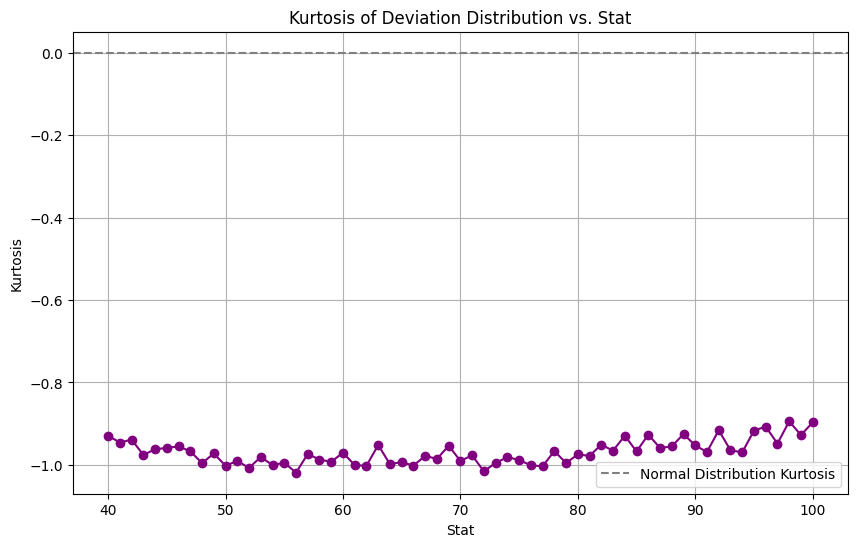

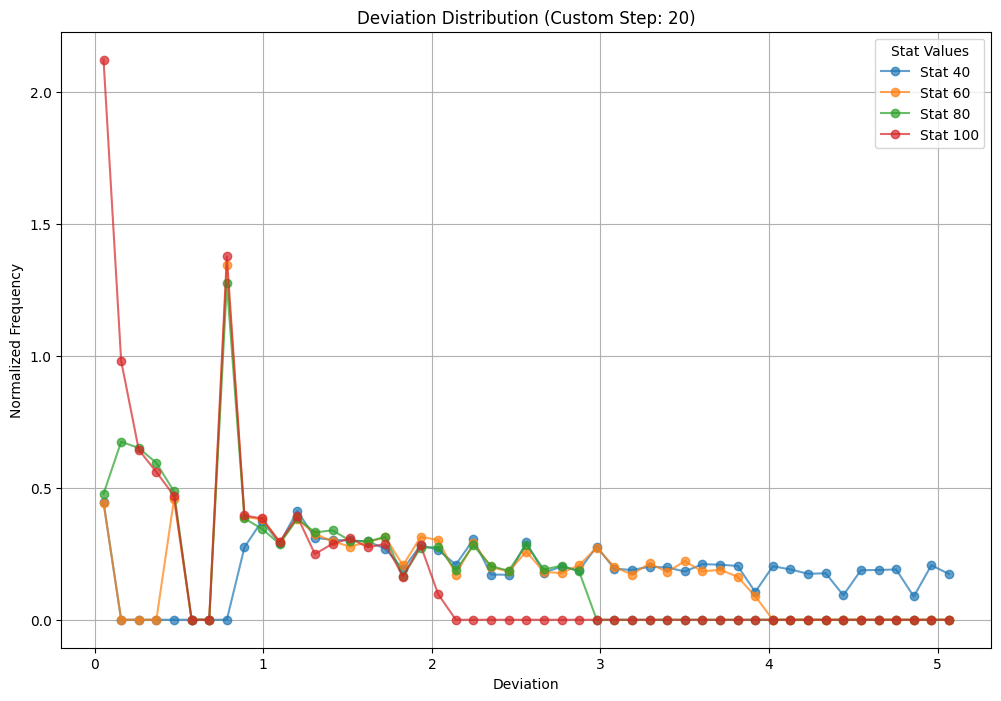

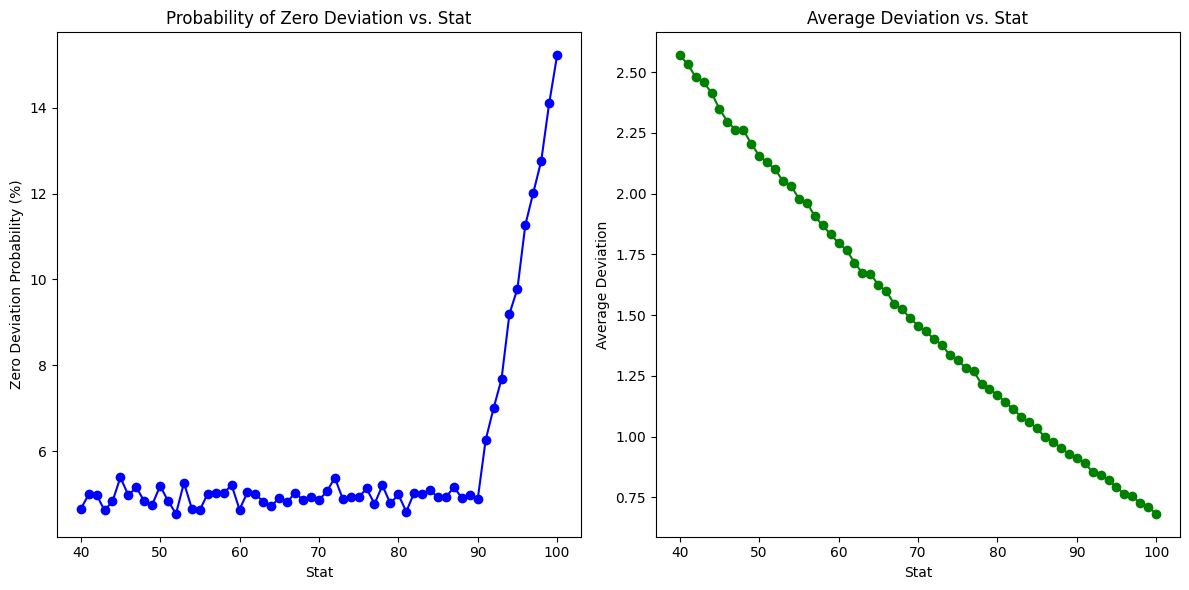

,Stat,Average,Perfect Throw (%)
0,40,2.569897,4.65
1,50,2.156843,5.19
2,60,1.796661,4.64
3,70,1.457445,4.86
4,80,1.171517,4.99
5,90,0.912126,4.88
6,100,0.682472,15.22


In [130]:
import pandas as pd
import random
import matplotlib.pyplot as plt
from scipy.stats import kurtosis
import numpy as np
import math


perfect_throw_threshold = 0.05
def_min_dev = 0.75
zero_min_dev_diff = 50
roll_zero_deviation_base = 5
num_dice = 1
potent = 2
roll_zero_deviation = 5

def unit_random_func(max_value):
    return random.randint(0, max_value - 1)

def calculate_deviation(stat, unit_random_func, is_grenade, base_gr_rotation_factor, base_launcher_rotation_factor):
    roll = unit_random_func(100) + 1  # Random roll between 1 and 100
    diff = stat - roll

    def_min_dev = 0.75
    min_deviation = 0 if diff >= 50 else def_min_dev

    rotation_factor = base_gr_rotation_factor if is_grenade else base_launcher_rotation_factor
    length_factor = 0.088

    if roll <= 5:
        deviation = 0
    else:
        deviation = max(min_deviation, ((100 - diff) ** 2) / (100 ** 2) * 2)

    deviation = 0 if deviation <= 0.05 else deviation

    return deviation, roll







#def unit_random_func(max_value, num_dice=3):
    
   # total = sum(random.randint(0, max_value) for _ in range(num_dice))
   # max_possible = num_dice * max_value
   # return int((total / max_possible) * max_value)



# Simulation settings
num_simulations = 10000
first_step = 40
last_step = 101
step = 1
stat_values = range(first_step, last_step, step)  
is_grenade = True
base_gr_rotation_factor = 22.00
base_launcher_rotation_factor = 12.00

# Collect results for each stat value
results = []

detailed_results = []

for stat in stat_values:
    for _ in range(num_simulations):
        deviation, roll = calculate_deviation(stat, unit_random_func, is_grenade, base_gr_rotation_factor, base_launcher_rotation_factor)


# Create DataFrame from detailed results

for stat in stat_values:
    deviations = []
    rolls = []
    
    for _ in range(num_simulations):
        deviation, roll = calculate_deviation(stat, unit_random_func, is_grenade, base_gr_rotation_factor, base_launcher_rotation_factor)
        deviations.append(deviation)
        rolls.append(roll)
        detailed_results.append({
            'Stat': stat,
            'Roll': roll,
            'Deviation': deviation
        })
    
    zero_deviation_count = deviations.count(0)
    zero_deviation_prob = zero_deviation_count / num_simulations * 100
    avg_deviation = sum(deviations) / num_simulations

    # Store results
    results.append({
        'Stat': stat,
        'Zero_Deviation_Probability (%)': zero_deviation_prob,
        'Average_Deviation': avg_deviation
    })




# Create DataFrame from results
results_df = pd.DataFrame(results)
detailed_df = pd.DataFrame(detailed_results)

# Display the results
print(results_df)

############################################################
kurtosis_results = detailed_df.groupby('Stat')['Deviation'].apply(lambda x: kurtosis(x, fisher=True))
# Plotting kurtosis vs. stat
plt.figure(figsize=(10, 6))
plt.plot(kurtosis_results.index, kurtosis_results.values, marker='o', color='purple')
plt.title('Kurtosis of Deviation Distribution vs. Stat')
plt.xlabel('Stat')
plt.ylabel('Kurtosis')
plt.axhline(0, color='gray', linestyle='--', label='Normal Distribution Kurtosis')
plt.legend()
plt.grid(True)
plt.show()
############################################################

distribution_graph_custom_step = 20  # Change this value to control how many lines are plotted

# Filter stat values based on the custom step
custom_stat_values = list(range(first_step, last_step, distribution_graph_custom_step))

# Plotting the distribution of deviations per custom stat range
plt.figure(figsize=(12, 8))

bins = np.linspace(0, detailed_df['Deviation'].max(), 50)

bar_width = (bins[1] - bins[0]) * 0.8  # Reduce the width of the bars a bit for better spacing

for i, stat in enumerate(custom_stat_values):
    deviations = detailed_df[detailed_df['Stat'] == stat]['Deviation']
    hist, bin_edges = np.histogram(deviations, bins=bins, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # Shift each stat's bars to the right by an offset to prevent overlap
    offset = i * (bar_width * 0)  # You can adjust the multiplier to control spacing

    ##plt.bar(bin_centers + offset, hist, width=bar_width, label=f'Stat {stat}', alpha=0.7)
    plt.plot(bin_centers, hist, marker='o', linestyle='-', label=f'Stat {stat}', alpha=0.7)

# Plot customization
plt.title(f'Deviation Distribution (Custom Step: {distribution_graph_custom_step})')
plt.xlabel('Deviation')
plt.ylabel('Normalized Frequency')
plt.legend(title='Stat Values')
plt.grid(True)
plt.show()

############################################################

############################################################
# Plotting the results
plt.figure(figsize=(12, 6))

# Plot Probability of Zero Deviation
plt.subplot(1, 2, 1)
plt.plot(results_df['Stat'], results_df['Zero_Deviation_Probability (%)'], marker='o', color='blue')
plt.title('Probability of Zero Deviation vs. Stat')
plt.xlabel('Stat')
plt.ylabel('Zero Deviation Probability (%)')

# Plot Average Deviation
plt.subplot(1, 2, 2)
plt.plot(results_df['Stat'], results_df['Average_Deviation'], marker='o', color='green')
plt.title('Average Deviation vs. Stat')
plt.xlabel('Stat')
plt.ylabel('Average Deviation')

plt.tight_layout()
plt.show()
############################################################

stats_avg_results = []
avg_results_step = 10
for stat_value in list(range(first_step, last_step, avg_results_step)):
    stat_DF = results_df[(results_df["Stat"] ==stat_value)]
    avg = stat_DF["Average_Deviation"].values[0]
    zero = stat_DF["Zero_Deviation_Probability (%)"].values[0]
    stats_avg_results.append({
        "Stat": stat_value,
        "Average": avg,
        "Perfect Throw (%)": zero})

stats_avg_resultsDF = pd.DataFrame(stats_avg_results) 
stats_avg_resultsDF

